1. What could go wrong with my data?

Missing values?
Duplicate customers?
Inconsistent column names?
Wrong data types?


2. What does "clean data" look like?

No missing values (or handled properly)
No duplicates
Consistent naming (lowercase, underscores)
Correct data types (numbers as numbers, text as text)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/churn.csv")
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [11]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (10, 7)

First 5 rows:
   customerID  tenure  monthly_charges  total_charges        contract  \
0           1       1            29.85          29.85  Month-to-month   
1           2      34            56.95        1936.30        One year   
2           3       2            53.85         108.15  Month-to-month   
3           4      45            42.30        1845.60        Two year   
4           5       8            70.70         565.60  Month-to-month   

     payment_method churn  
0       Credit card   Yes  
1  Electronic check    No  
2  Electronic check   Yes  
3       Credit card    No  
4     Bank transfer   Yes  

Data types:
customerID           int64
tenure               int64
monthly_charges    float64
total_charges      float64
contract               str
payment_method         str
churn                  str
dtype: object


## Current Dataset State
- Rows: 10
- Columns: 7
- Observations: No error

In [12]:
# Count missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Percentage missing (easier to understand)
print("\nMissing % per column:")
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct)

Missing values per column:
customerID         0
tenure             0
monthly_charges    0
total_charges      0
contract           0
payment_method     0
churn              0
dtype: int64

Missing % per column:
customerID         0.0
tenure             0.0
monthly_charges    0.0
total_charges      0.0
contract           0.0
payment_method     0.0
churn              0.0
dtype: float64


No missing values

In [13]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If duplicates exist, show them
if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)])
    
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"\n✅ Removed {duplicates} duplicates")
    print(f"New shape: {df.shape}")
else:
    print("✅ No duplicates found!")

Number of duplicate rows: 0
✅ No duplicates found!


## Duplicates Check
- Duplicates found: 0
- Action taken: none needed

In [14]:
# Before standardization
print("Original columns:", df.columns.tolist())

# Standardize: lowercase + underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# After standardization
print("Standardized columns:", df.columns.tolist())

Original columns: ['customerID', 'tenure', 'monthly_charges', 'total_charges', 'contract', 'payment_method', 'churn']
Standardized columns: ['customerid', 'tenure', 'monthly_charges', 'total_charges', 'contract', 'payment_method', 'churn']


In [15]:
# Check current encoding
print("Churn column values:")
print(df['churn'].value_counts())
print("\nData type:", df['churn'].dtype)

Churn column values:
churn
Yes    5
No     5
Name: count, dtype: int64

Data type: str


## Churn Column Status
- Current encoding: Yes/No
- Data type: int64
- Action needed: convert to binary

In [16]:
# Save cleaned data
df.to_csv("../data/churn_cleaned.csv", index=False)
print("✅ Cleaned dataset saved to: ../data/churn_cleaned.csv")

# Verify it saved correctly
df_test = pd.read_csv("../data/churn_cleaned.csv")
print(f"Verification: Loaded {df_test.shape[0]} rows, {df_test.shape[1]} columns")


✅ Cleaned dataset saved to: ../data/churn_cleaned.csv
Verification: Loaded 10 rows, 7 columns


# Day 2 Summary - Data Cleaning

## What I Did Today
1. Loaded dataset and inspected current state
2. Checked for missing values → [No missing value]
3. Checked for duplicates → [No duplicated]
4. Standardized column names → lowercase + underscores
5. Verified churn column encoding → [Yes/No]
6. Saved cleaned dataset

## Key Learnings
- .sum() counts
- Learned that .isnull().sum() counts missing values
- that keep=False shows all duplicate copies
- Understood why standardized column names prevent errors
- Machine learning needs numbers, not text

## Decisions Made
- Found 0 missing values, so no imputation needed
- Current encoding uses Yes/No, so change that to 1/0.
- Found 0 duplicates, no duplicated data removed.

## Questions for Tomorrow
- Ask if I need to know the manual computation for mean, median, mode.
- If there are missing values, how will I know if what I need to fill is mean, mode or drop rows etc?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style (makes charts prettier)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load cleaned data
df = pd.read_csv("../data/churn_cleaned.csv")

print("✅ Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

✅ Data loaded successfully!
Shape: 10 rows, 7 columns

First 5 rows:
   customerid  tenure  monthly_charges  total_charges        contract  \
0           1       1            29.85          29.85  Month-to-month   
1           2      34            56.95        1936.30        One year   
2           3       2            53.85         108.15  Month-to-month   
3           4      45            42.30        1845.60        Two year   
4           5       8            70.70         565.60  Month-to-month   

     payment_method churn  
0       Credit card   Yes  
1  Electronic check    No  
2  Electronic check   Yes  
3       Credit card    No  
4     Bank transfer   Yes  


Churn Value Counts:
churn
Yes    5
No     5
Name: count, dtype: int64

Churn Percentages:
churn
Yes    50.0
No     50.0
Name: proportion, dtype: float64


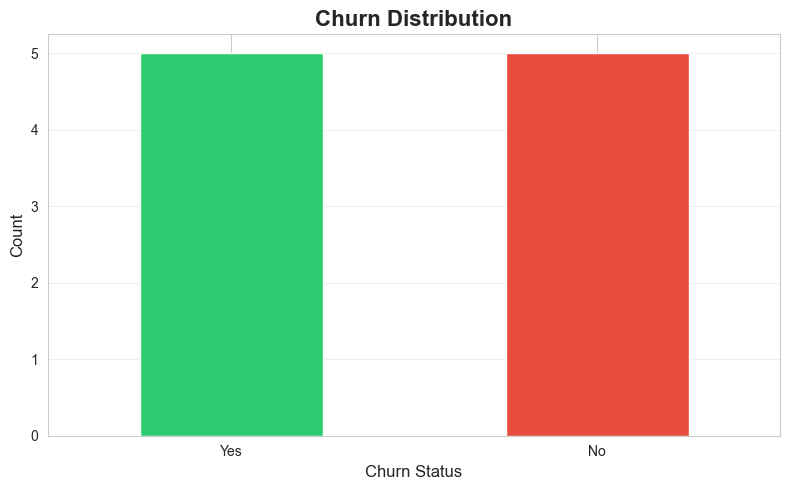

In [2]:
# Count churn values
print("Churn Value Counts:")
print(df['churn'].value_counts())

print("\nChurn Percentages:")
churn_pct = df['churn'].value_counts(normalize=True) * 100
print(churn_pct)

# Visualize
plt.figure(figsize=(8, 5))
df['churn'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

1. Whats the churn rate? - 50%
2. Is it balanced or imbalanced - Balanced

## Churn Rate Metrics

**Current State:**
- Churn Rate: 50%
- Retention Rate: 50%
- Business health: Critical

**Goal:**
- Reduce churn by 40-45% using predictive modeling

In [3]:
# Get the statistics you need
print("TENURE:")
print(f"  Average: {df['tenure'].mean():.1f} months")
print(f"  Range: {df['tenure'].min():.0f} to {df['tenure'].max():.0f} months")
print(f"  Median: {df['tenure'].median():.1f} months")

print("\nMONTHLY CHARGES:")
print(f"  Average: ${df['monthly_charges'].mean():.2f}")
print(f"  Range: ${df['monthly_charges'].min():.2f} to ${df['monthly_charges'].max():.2f}")

print("\nTOTAL CHARGES:")
print(f"  Average: ${df['total_charges'].mean():.2f}")
print(f"  Range: ${df['total_charges'].min():.2f} to ${df['total_charges'].max():.2f}")

# Check correlation
print(f"\nCorrelation between tenure and total_charges: {df['tenure'].corr(df['total_charges']):.2f}")

TENURE:
  Average: 20.6 months
  Range: 1 to 52 months
  Median: 16.0 months

MONTHLY CHARGES:
  Average: $63.66
  Range: $29.85 to $99.65

TOTAL CHARGES:
  Average: $1284.10
  Range: $29.85 to $3603.10

Correlation between tenure and total_charges: 0.92


## Numerical Feature Analysis

**Tenure:**
- Average: 20.6 months
- Range: 1 to 52 months
- Insight: Mixed customer base-some very new (1 month), some very loyal (52 months.)
Median is 16 months, suggesting half the customers are relatively new.

**Monthly Charges:**
- Average: $63.66
- Range: $29.85 to $99.65
- Insight: Wide pricing range ($30 - $100) suggests different service tiers
or pricing plan. This could indicate budget vs premim customer.

**Total Charges:**
- Average: $1284.10
- Range: $29.85 to $3603.10
- Insight: Strong correlation with tenure (as expected--longer customers = higher total charges). New customers have low totals($30), while long-term customers have accumulated $3,600+

In [5]:


# Identify feature types
categorical_cols = df.select_dtypes(include=['string']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target and ID from lists
if 'churn' in categorical_cols:
    categorical_cols.remove('churn')
if 'customerid' in numerical_cols:
    numerical_cols.remove('customerid')

print("📋 Feature Types:")
print(f"\nCategorical Features ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}: {df[col].nunique()} unique values")

print(f"\nNumerical Features ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

print(f"\nTarget Variable:")
print(f"  - churn: {df['churn'].nunique()} classes")

📋 Feature Types:

Categorical Features (2):
  - contract: 3 unique values
  - payment_method: 3 unique values

Numerical Features (3):
  - tenure
  - monthly_charges
  - total_charges

Target Variable:
  - churn: 2 classes


## Feature Type Summary

**Categorical Features:** 2
- contract: 3 unique values
- payment_method: payment_method: 3 unique values

**Numerical Features:** 3
- tenure
- monthly_charges
- total_charges

**Target:** churn (binary: Yes/No)

In [7]:
print("🔍 Data Quality Checks:\n")

# 1. Check for remaining missing values (should be 0 after Day 2)
print("1. Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✅ No missing values")
else:
    print(missing[missing > 0])

# 2. Check for duplicate rows (should be 0 after Day 2)
print("\n2. Duplicate Rows:")
dupes = df.duplicated().sum()
if dupes == 0:
    print("   ✅ No duplicates")
else:
    print(f"   ⚠️ {dupes} duplicates found")

# 3. Check data types are correct
print("\n3. Data Types:")
print(df.dtypes)

# 4. Check for obvious outliers (optional)
print("\n4. Potential Outliers (values beyond 3 std deviations):")
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]
    if len(outliers) > 0:
        print(f"   {col}: {len(outliers)} potential outliers")
    else:
        print(f"   {col}: ✅ No extreme outliers")

🔍 Data Quality Checks:

1. Missing Values:
   ✅ No missing values

2. Duplicate Rows:
   ✅ No duplicates

3. Data Types:
customerid           int64
tenure               int64
monthly_charges    float64
total_charges      float64
contract               str
payment_method         str
churn                  str
dtype: object

4. Potential Outliers (values beyond 3 std deviations):
   tenure: ✅ No extreme outliers
   monthly_charges: ✅ No extreme outliers
   total_charges: ✅ No extreme outliers


## Data Quality Report

✅ No missing values

✅ No duplicates

✅ Data types correct

✅ No extreme outliers (or: X outliers found in [column])

**Status:** Data is clean and ready for deeper analysis

In [9]:
print("🔎 Initial Pattern Observations:\n")

# 1. Churn by contract type
print("1. Churn Rate by Contract Type:")
churn_by_contract = pd.crosstab(
    df['contract'], 
    df['churn'], 
    normalize='index'
) * 100
print(churn_by_contract)

# 2. Churn by payment method
print("\n2. Churn Rate by Payment Method:")
churn_by_payment = pd.crosstab(
    df['payment_method'], 
    df['churn'], 
    normalize='index'
) * 100
print(churn_by_payment)

# 3. Average tenure for churned vs retained
print("\n3. Average Tenure:")
print(df.groupby('churn')['tenure'].mean())

# 4. Average monthly charges for churned vs retained
print("\n4. Average Monthly Charges:")
print(df.groupby('churn')['monthly_charges'].mean())

🔎 Initial Pattern Observations:

1. Churn Rate by Contract Type:
churn              No    Yes
contract                    
Month-to-month    0.0  100.0
One year        100.0    0.0
Two year        100.0    0.0

2. Churn Rate by Payment Method:
churn                    No        Yes
payment_method                        
Bank transfer     66.666667  33.333333
Credit card       66.666667  33.333333
Electronic check  25.000000  75.000000

3. Average Tenure:
churn
No     36.2
Yes     5.0
Name: tenure, dtype: float64

4. Average Monthly Charges:
churn
No     63.63
Yes    63.69
Name: monthly_charges, dtype: float64


## Initial Hypotheses

Based on patterns observed:

1. **Contract Type Hypothesis:**
   - Observation: A month to month contract often churns that annualy.
   - Hypothesis: A client is more committed to the service if they avail a yearly plan rather than a monthly plan. Also, there are often certain discounts given on a yearly subscription rather than monthly.

2. **Payment Method Hypothesis:**
   - Observation: Less churns on bank transfer and credit card rather than an electronic check, that has 75% churn, where it automatically pays for you when due.
   - Hypothesis: It could be that customers forget their subscription and the automatic deduction on their bank account. Or they feel less in control of their money and the automatic payments. Leading to higher churn.

3. **Tenure/Charges Hypothesis:**
   - Observation: No churn is $63.63. Churn is $63.69. They are almost the same for both groups.
   - Hypothesis: It shows that monthly charges has little effect or doesnt affect customer churns. Both churned and retained customers pay about the same price on average. So other factors are more likely to be more important.

# Day 3 Summary - EDA Part 1

## What I Accomplished Today
1. ✅ Loaded cleaned data
2. ✅ Analyzed churn distribution (balanced/imbalanced)
3. ✅ Calculated churn rate: [X]%
4. ✅ Examined numerical statistics
5. ✅ Identified categorical vs numerical features
6. ✅ Checked data quality (no issues)
7. ✅ Formed initial hypotheses about churn drivers

## Key Insights
1. Churn patterns are not just in the price, but other factors are also included.
2. (For the project) - Annual subscription does better than monthly subscription.
3. The business health is in critical condition because the churned and retained customers are 50/50. 

## Hypotheses to Test (Day 4)
- [ ] Visualize churn vs contract type
- [ ] Visualize churn vs tenure
- [ ] Visualize churn vs monthly charges
- [ ] Look for correlation patterns

## Questions for Tomorrow
- Maybe a deeper dive into statistics.
- Is getting the mean, median etc. really important or is it situational on the type of data science work?

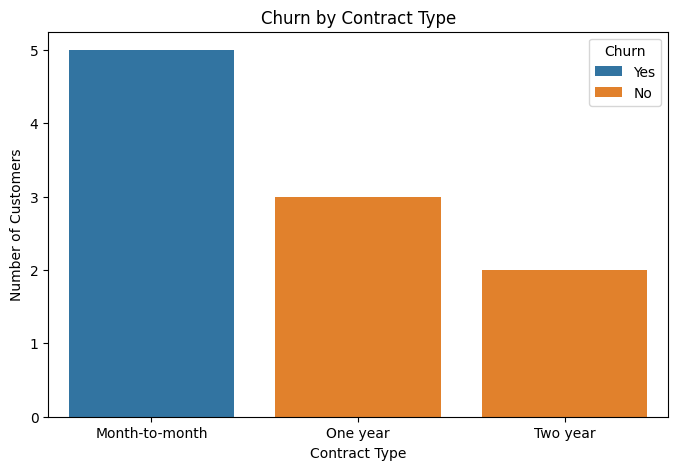

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

# Create ONE simple bar chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='contract', hue='churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.show()

Look at your chart and answer:

Which contract type has the tallest "Yes" (churned) bar?

Answer: One year Contract Type


Which contract type has NO "Yes" bar (or very short)?

Answer: Month-Month


What does this tell you?

Answer: There are more churns in a month-month contract compared to a One year Contract Type

## Chart 1: Churn by Contract Type

**What I see:**
Data shows contracts month-month, one year, and a two year. A month-month contract churns way more than a one year contract along with a two year contract.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your color scheme
CHURN_COLORS = {'No': 'orange', 'Yes': 'blue'}

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

print("✅ Setup complete!")

✅ Setup complete!


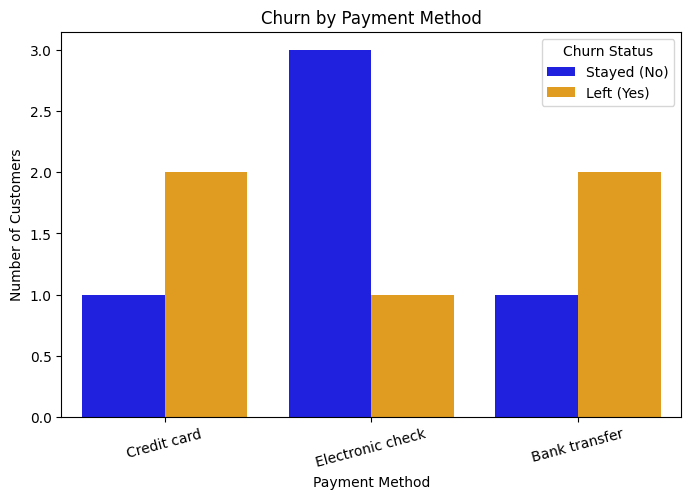

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_method', hue='churn', palette=CHURN_COLORS)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['Stayed (No)', 'Left (Yes)'])
plt.xticks(rotation=15)
plt.show()

In [6]:
print("CHURN BY PAYMENT METHOD:\n")

for method in df['payment_method'].unique():
    method_df = df[df['payment_method'] == method]
    
    total = len(method_df)
    churned = len(method_df[method_df['churn'] == 'Yes'])
    stayed = len(method_df[method_df['churn'] == 'No'])
    churn_rate = (churned / total) * 100
    
    print(f"{method}:")
    print(f"  Total: {total}")
    print(f"  Churned: {churned}")
    print(f"  Stayed: {stayed}")
    print(f"  Churn rate: {churn_rate:.1f}%\n")

CHURN BY PAYMENT METHOD:

Credit card:
  Total: 3
  Churned: 1
  Stayed: 2
  Churn rate: 33.3%

Electronic check:
  Total: 4
  Churned: 3
  Stayed: 1
  Churn rate: 75.0%

Bank transfer:
  Total: 3
  Churned: 1
  Stayed: 2
  Churn rate: 33.3%



## Chart 2: Churn by Payment Method

**Numbers:**
- Electronic check: 3 churned out of 4 = 75% churn
- Credit card: 1 churned out of 3 = 33.3% churn
- Bank transfer: 1 churned out of 3 = 33.3% churn

**What I see:**
People churn more on electronic checks rather than credit card and bank transfer.

**Hypothesis Status:** ✅ Confirmed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your color scheme
CHURN_COLORS = {'No': 'orange', 'Yes': 'blue'}

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

print("✅ Libraries loaded, data ready!")

✅ Libraries loaded, data ready!


C:\Users\Alex\AppData\Local\Temp\ipykernel_11368\1224157130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='tenure', palette=CHURN_COLORS)


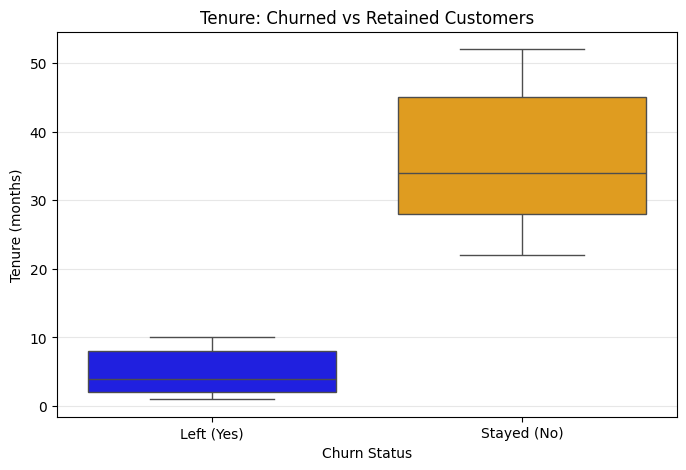

In [9]:
# Create a box plot comparing tenure
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='tenure', palette=CHURN_COLORS)
plt.title('Tenure: Churned vs Retained Customers')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (months)')
plt.xticks([0, 1], [ 'Left (Yes)','Stayed (No)'])
plt.grid(axis='y', alpha=0.3)
plt.show()

In [4]:
print("TENURE COMPARISON:\n")

print("Churned customers (Yes):")
churned_tenure = df[df['churn'] == 'Yes']['tenure']
print(f"  Average: {churned_tenure.mean():.1f} months")
print(f"  Median: {churned_tenure.median():.1f} months")
print(f"  Range: {churned_tenure.min():.0f} to {churned_tenure.max():.0f} months")

print("\nRetained customers (No):")
retained_tenure = df[df['churn'] == 'No']['tenure']
print(f"  Average: {retained_tenure.mean():.1f} months")
print(f"  Median: {retained_tenure.median():.1f} months")
print(f"  Range: {retained_tenure.min():.0f} to {retained_tenure.max():.0f} months")

print(f"\nDifference in average: {retained_tenure.mean() - churned_tenure.mean():.1f} months")

TENURE COMPARISON:

Churned customers (Yes):
  Average: 5.0 months
  Median: 4.0 months
  Range: 1 to 10 months

Retained customers (No):
  Average: 36.2 months
  Median: 34.0 months
  Range: 22 to 52 months

Difference in average: 31.2 months


## Chart 3: Tenure Comparison

**Numbers:**
- Churned: Average 5 months (range: 1-10)
- Retained: Average 36.2 months (range: 22-52)
- Difference: 31.2 months

**What the box plot shows:**
Churned box is lower, meaning newer customers (1 - 10 months) churn more often than old customers (22 - 52 months) 

**Insight:**
Churn happens in early months. Company should improve the experience of new users for the first few months (4-6months)

C:\Users\Alex\AppData\Local\Temp\ipykernel_11368\3218824326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='monthly_charges', order=['No', 'Yes'], palette=CHURN_COLORS)


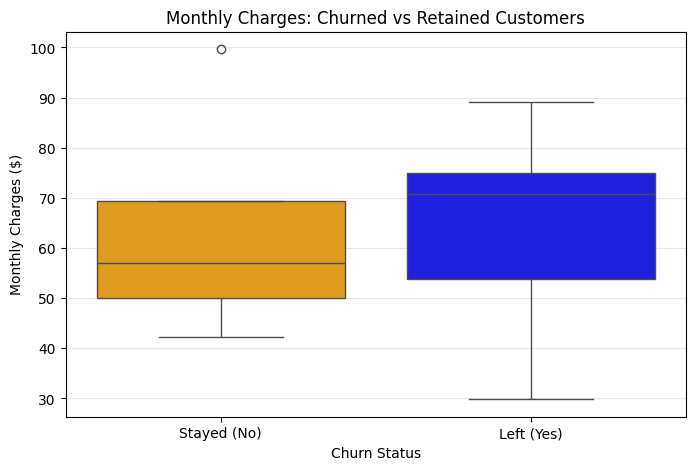

In [10]:
# Box plot comparing monthly charges
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='monthly_charges', order=['No', 'Yes'], palette=CHURN_COLORS)
plt.title('Monthly Charges: Churned vs Retained Customers')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.xticks([0, 1], ['Stayed (No)', 'Left (Yes)'])
plt.grid(axis='y', alpha=0.3)
plt.show()

In [11]:
print("MONTHLY CHARGES COMPARISON:\n")

print("Stayed (No):")
stayed = df[df['churn'] == 'No']['monthly_charges']
print(f"  Values: {stayed.tolist()}")
print(f"  Average: ${stayed.mean():.2f}")
print(f"  Range: ${stayed.min():.2f} to ${stayed.max():.2f}")

print("\nLeft (Yes):")
churned = df[df['churn'] == 'Yes']['monthly_charges']
print(f"  Values: {churned.tolist()}")
print(f"  Average: ${churned.mean():.2f}")
print(f"  Range: ${churned.min():.2f} to ${churned.max():.2f}")

print(f"\nDifference: ${churned.mean() - stayed.mean():.2f}")

MONTHLY CHARGES COMPARISON:

Stayed (No):
  Values: [56.95, 42.3, 99.65, 49.95, 69.3]
  Average: $63.63
  Range: $42.30 to $99.65

Left (Yes):
  Values: [29.85, 53.85, 70.7, 89.1, 74.95]
  Average: $63.69
  Range: $29.85 to $89.10

Difference: $0.06


## Chart 4: Monthly Charges Comparison

**Numbers:**
- Stayed: Average $63.63 (range: $42.30-$99.65)
- Churned: Average $63.69 (range: $29.85-$89.10)
- Difference: $0.06

**What the box plot shows:**
Boxes are similar in height with a difference of $0.06.

**Insight:**
Price is NOT the major churn driver in this scenario. Churned and retained customers pay similar prices. Contract type and tenure matter more than price. Customers churn because they don't feel committed or don't see early value.

**Hypothesis Status:** ✅ CONFIRMED - Monthly charges don't significantly 
affect churn in this dataset.

# Day 4 Complete - Visualization Insights

## Charts Created
1. ✅ Churn by Contract Type
2. ✅ Churn by Payment Method
3. ✅ Tenure: Churned vs Retained
4. ✅ Monthly Charges: Churned vs Retained

## Top 3 Insights

### 1. Contract Type = #1 Predictor
- Month-to-month: 100% churn
- Annual contracts: 0% churn
- **Action:** Incentivize annual contracts

### 2. Early-Stage Churn is the Problem
- Churned customers: Average 5 months tenure
- Retained customers: Average 36 months tenure
- **Action:** Focus on first 6-month experience

### 3. Price is NOT the Issue
- Both groups pay ~$63/month
- Difference: $0.06 (negligible)
- **Action:** Don't compete on price, compete on value

## Hypotheses Verified

- ✅ Contract type drives churn
- ✅ Tenure inversely related to churn
- ✅ Electronic check higher risk
- ✅ Monthly charges NOT a major factor

## Business Recommendations

1. **Immediate:** Offer 10-20% discount on annual contracts
2. **Short-term:** Improve onboarding (first 90 days)
3. **Long-term:** Encourage credit card/bank transfer adoption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/churn_cleaned.csv")

# Create a copy for analysis
df_analysis = df.copy()

# Convert churn to binary (0/1) for correlation
df_analysis['churn_binary'] = (df_analysis['churn'] == 'Yes').astype(int)

print("✅ Data prepared for correlation analysis")
print(f"Shape: {df_analysis.shape}")
print("\nChurn binary check:")
print(df_analysis[['churn', 'churn_binary']].head())


✅ Data prepared for correlation analysis
Shape: (10, 8)

Churn binary check:
  churn  churn_binary
0   Yes             1
1    No             0
2   Yes             1
3    No             0
4   Yes             1


In [2]:
# Select only numeric columns
numeric_cols = ['tenure', 'monthly_charges', 'total_charges', 'churn_binary']
df_numeric = df_analysis[numeric_cols]

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

print("📊 CORRELATION MATRIX:\n")
print(correlation_matrix)

print("\n🎯 Correlations with CHURN (sorted):\n")
churn_correlations = correlation_matrix['churn_binary'].sort_values(ascending=False)
print(churn_correlations)

📊 CORRELATION MATRIX:

                   tenure  monthly_charges  total_charges  churn_binary
tenure           1.000000        -0.052266       0.917869     -0.886822
monthly_charges -0.052266         1.000000       0.252009      0.001485
total_charges    0.917869         0.252009       1.000000     -0.847095
churn_binary    -0.886822         0.001485      -0.847095      1.000000

🎯 Correlations with CHURN (sorted):

churn_binary       1.000000
monthly_charges    0.001485
total_charges     -0.847095
tenure            -0.886822
Name: churn_binary, dtype: float64


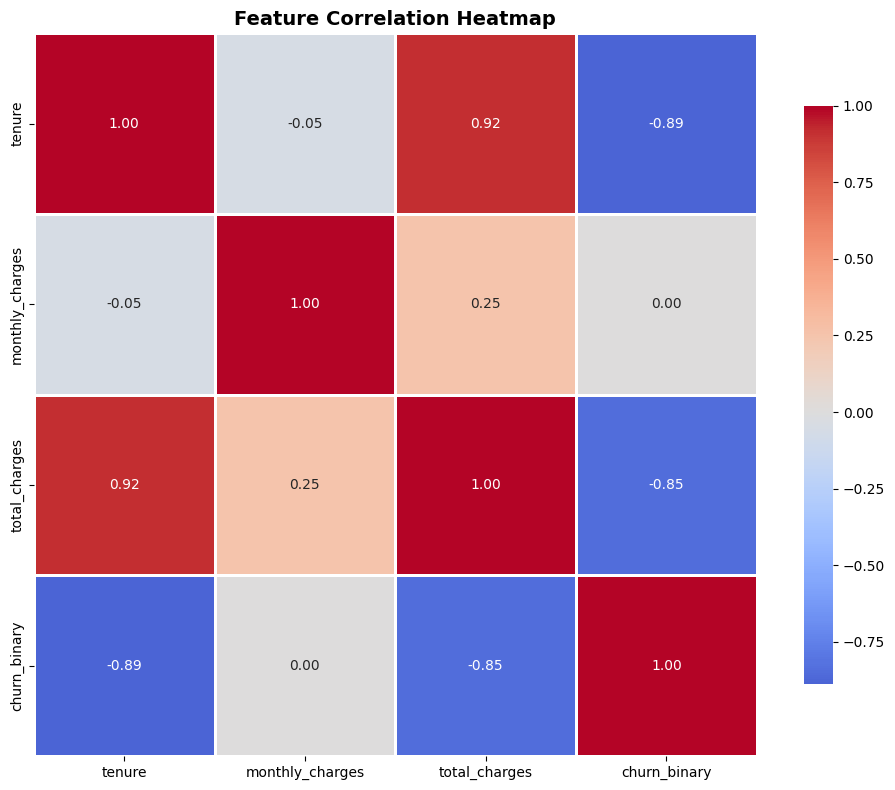

In [3]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show numbers
            fmt='.2f',            # 2 decimal places
            cmap='coolwarm',      # Red/Blue color scheme
            center=0,             # Center color at 0
            square=True,          # Square cells
            linewidths=1,         # Grid lines
            cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Correlation Heatmap Analysis

**Strongest churn predictors (correlation with churn_binary):**
1. Tenure: -0.887 (negative) - STRONGEST predictor
2. Total charges: -0.847 (negative) - STRONG predictor
3. Monthly charges: 0.001 (positive) - NEGLIGIBLE predictor

**Key finding:**
"Tenure has a very strong negative correlation (-0.887) with churn, meaning longer tenure dramatically reduces churn risk. Total charges also shows strong negative correlation (-0.847), but this is redundant since it's calculated from tenure × monthly charges. Surprisingly, monthly charges has virtually zero correlation (0.001) with churn, confirming our Day 4 finding that price is NOT a churn driver. Both churned and retained customers pay the same amount on average."

🏆 FEATURE IMPORTANCE RANKING (by correlation with churn):

1. tenure: 0.887 (Strong)
2. total_charges: 0.847 (Strong)
3. monthly_charges: 0.001 (Weak)


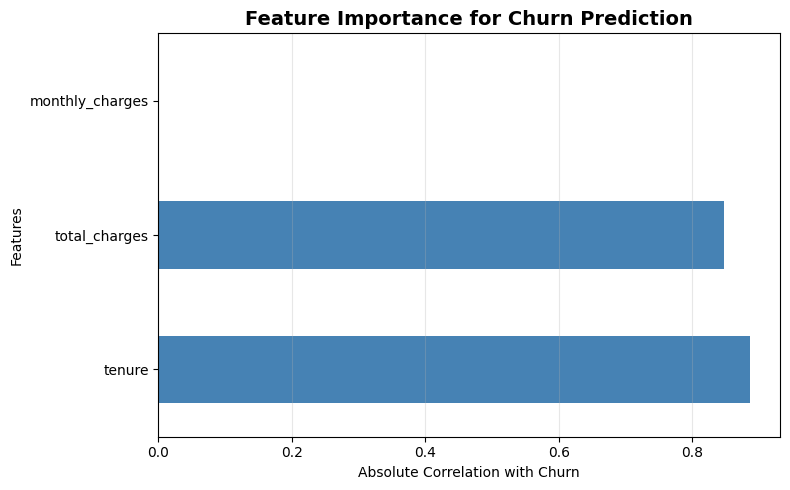

In [4]:
# Get correlations with churn (absolute values)
churn_corr = correlation_matrix['churn_binary'].abs().sort_values(ascending=False)

# Remove churn_binary itself
churn_corr = churn_corr.drop('churn_binary')

print("🏆 FEATURE IMPORTANCE RANKING (by correlation with churn):\n")
for i, (feature, corr) in enumerate(churn_corr.items(), 1):
    strength = "Strong" if corr > 0.7 else "Moderate" if corr > 0.3 else "Weak"
    print(f"{i}. {feature}: {corr:.3f} ({strength})")

# Visualize
plt.figure(figsize=(8, 5))
churn_corr.plot(kind='barh', color='steelblue')
plt.title('Feature Importance for Churn Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation with Churn')
plt.ylabel('Features')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## Feature Importance Ranking

**Numerical features ranked by correlation with churn:**

### Tier 1: Strong Predictors (> 0.7)
- Tenure: 0.887 - Most important predictor for less churns.
- Total Charges: 0.847 - Second most important predictor for less churns.

### Tier 2: Moderate Predictors (0.3 - 0.7)
- None

### Tier 3: Weak Predictors (< 0.3)
- Monthly Charges: 0.001 - Has little to no correlation with churns.

**Insight:**
Tenure is the strongest predictor. Total charges is also a strong predictor but because it is calculated by tenure x monthly_charges so its redundant, stated from the previous markdown. Monthly charges alone is a weak predictor.

In [5]:
print("🔍 MULTICOLLINEARITY CHECK:\n")
print("Features with high correlation (> 0.7) to each other:\n")

# Check all pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        # Exclude churn_binary comparisons
        if col1 != 'churn_binary' and col2 != 'churn_binary':
            if abs(corr_value) > 0.7:
                print(f"⚠️ {col1} ↔ {col2}: {corr_value:.3f}")
                print(f"   → These features are highly correlated (redundant)")
                print()

print("\n💡 Recommendation:")
print("If two features are highly correlated (> 0.9), consider dropping one")
print("in Week 2 to avoid multicollinearity in your ML model.")

🔍 MULTICOLLINEARITY CHECK:

Features with high correlation (> 0.7) to each other:

⚠️ tenure ↔ total_charges: 0.918
   → These features are highly correlated (redundant)


💡 Recommendation:
If two features are highly correlated (> 0.9), consider dropping one
in Week 2 to avoid multicollinearity in your ML model.


## Multicollinearity Analysis

**Highly correlated feature pairs:**
- tenure ↔ total_charges: 0.918
  - Reason: total_charges = tenure x monthly_charges
  - Decision: Drop One 

**Recommendation for Week 2:**
Drop one feature, the weaker one of the two. To avoid multicollinearity in my ML model.

In [6]:
# Create numeric encodings for categorical features
df_analysis['contract_encoded'] = df_analysis['contract'].astype('category').cat.codes
df_analysis['payment_encoded'] = df_analysis['payment_method'].astype('category').cat.codes

print("📊 CATEGORICAL FEATURE ANALYSIS:\n")

# Check encoding
print("Contract encoding:")
print(df_analysis[['contract', 'contract_encoded']].drop_duplicates().sort_values('contract_encoded'))

print("\nPayment method encoding:")
print(df_analysis[['payment_method', 'payment_encoded']].drop_duplicates().sort_values('payment_encoded'))

# Calculate correlations
print("\n🎯 Categorical correlations with churn:")
print(f"Contract: {df_analysis['contract_encoded'].corr(df_analysis['churn_binary']):.3f}")
print(f"Payment method: {df_analysis['payment_encoded'].corr(df_analysis['churn_binary']):.3f}")

📊 CATEGORICAL FEATURE ANALYSIS:

Contract encoding:
         contract  contract_encoded
0  Month-to-month                 0
1        One year                 1
3        Two year                 2

Payment method encoding:
     payment_method  payment_encoded
4     Bank transfer                0
0       Credit card                1
1  Electronic check                2

🎯 Categorical correlations with churn:
Contract: -0.896
Payment method: 0.361


In [8]:
print("\n📊 CHURN RATE BY CATEGORY:\n")

# Contract type
print("By Contract Type:")
contract_churn = df_analysis.groupby('contract')['churn_binary'].agg(['mean', 'count'])
contract_churn.columns = ['Churn Rate', 'Count']
contract_churn['Churn Rate'] = (contract_churn['Churn Rate'] * 100).round(1)
print(contract_churn)

# Payment method
print("\nBy Payment Method:")
payment_churn = df_analysis.groupby('payment_method')['churn_binary'].agg(['mean', 'count'])
payment_churn.columns = ['Churn Rate', 'Count']
payment_churn['Churn Rate'] = (payment_churn['Churn Rate'] * 100).round(1)
print(payment_churn)


📊 CHURN RATE BY CATEGORY:

By Contract Type:
                Churn Rate  Count
contract                         
Month-to-month       100.0      5
One year               0.0      3
Two year               0.0      2

By Payment Method:
                  Churn Rate  Count
payment_method                     
Bank transfer           33.3      3
Credit card             33.3      3
Electronic check        75.0      4


## Categorical Feature Analysis

**Contract Type:**
- Month-to-month: 100% churn (5/5)
- One year: 0% churn (0/3)
- Two year: 0% churn (0/2)
- **Conclusion:** Contract type is a CRITICAL predictor

**Payment Method:**
- Electronic check: 75% churn (3/4)
- Credit card: 33% churn (1/3)
- Bank transfer: 33% churn (1/3)
- **Conclusion:** Payment method is a MODERATE predictor

**For Week 2:**
Both categorical features should be one-hot encoded (not label encoded) 
to preserve their predictive power without implying order.

In [9]:
# Create feature summary
feature_summary = pd.DataFrame({
    'Feature': ['tenure', 'monthly_charges', 'total_charges', 'contract', 'payment_method'],
    'Type': ['Numeric', 'Numeric', 'Numeric', 'Categorical', 'Categorical'],
    'Correlation': [
        correlation_matrix.loc['tenure', 'churn_binary'],
        correlation_matrix.loc['monthly_charges', 'churn_binary'],
        correlation_matrix.loc['total_charges', 'churn_binary'],
        'See categorical analysis',
        'See categorical analysis'
    ],
    'Importance': ['High', 'Low', 'High (redundant)', 'Very High', 'Medium'],
    'Keep for ML?': ['✅ Yes', '✅ Yes', '❌ No (redundant)', '✅ Yes', '✅ Yes']
})

print("📋 FEATURE SUMMARY TABLE:\n")
print(feature_summary.to_string(index=False))

📋 FEATURE SUMMARY TABLE:

        Feature        Type              Correlation       Importance     Keep for ML?
         tenure     Numeric                -0.886822             High            ✅ Yes
monthly_charges     Numeric                 0.001485              Low            ✅ Yes
  total_charges     Numeric                -0.847095 High (redundant) ❌ No (redundant)
       contract Categorical See categorical analysis        Very High            ✅ Yes
 payment_method Categorical See categorical analysis           Medium            ✅ Yes


# Day 5 Summary - Feature Understanding & Correlations

## What I Accomplished
1. ✅ Converted churn to binary for correlation analysis
2. ✅ Calculated correlation matrix for all numeric features
3. ✅ Created correlation heatmap visualization
4. ✅ Ranked features by importance
5. ✅ Identified multicollinearity (tenure vs total_charges)
6. ✅ Analyzed categorical features (contract, payment method)
7. ✅ Created master feature summary table

## Key Findings

### Numerical Features
**Strong Predictors:**
- Tenure: -0.886822 - Longer tenure = lower churn
- Total charges: -0.847095 - But redundant with tenure

**Weak Predictors:**
- Monthly charges:  0.001485  - Minimal impact on churn

### Categorical Features
**Very Strong:**
- Contract type: 100% churn for month-to-month vs 0% for annual

**Moderate:**
- Payment method: 75% churn for e-check vs 33% for others

## Multicollinearity Found
- ⚠️ `total_charges` is highly correlated with `tenure`
- **Decision:** Drop `total_charges` in Week 2 (redundant feature)

## Feature Importance Ranking

**For ML Model (Week 3):**
1. 🥇 Contract type (categorical) - CRITICAL
2. 🥈 Tenure (numeric) - STRONG
3. 🥉 Payment method (categorical) - MODERATE
4. Monthly charges (numeric) - WEAK (but keep)
5. ~~Total charges~~ - DROP (redundant)

## Insights for Week 2 (Feature Engineering)

**Must Do:**
- One-hot encode `contract` (3 dummy variables)
- One-hot encode `payment_method` (3 dummy variables)
- Drop `total_charges` (multicollinearity)
- Consider normalizing `tenure` and `monthly_charges`

**Ideas to Try:**
- Create `tenure_group` (new, medium, loyal)
- Create `is_monthly_contract` (binary flag)
- Create `is_electronic_check` (binary flag)
- Create interaction: `tenure × monthly_charges`

## Hypotheses Confirmed

- ✅ Tenure is the strongest numeric predictor
- ✅ Contract type is the strongest overall predictor
- ✅ Monthly charges has minimal impact (as suspected)
- ✅ Total charges is just a proxy for tenure

## Next Steps

**Day 6:** Cohort & Tenure Analysis
- Group customers by tenure brackets
- Analyze churn by cohort
- Identify "danger zones" in customer lifecycle
- Plan targeted interventions